# Employee Mental Health Risk Prediction

This project uses machine learning models to predict whether an employee is likely to seek treatment for mental health issues based on workplace and demographic factors.

---

## Problem Statement

Mental health issues in the workplace are increasingly common yet under-addressed. Early detection can help HR teams, mental health advocates, and companies offer the right support systems.

**Goal**: Predict if an employee is likely to seek mental health treatment using survey responses.


In [8]:
%pip install pandas numpy seaborn matplotlib scikit-learn xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    roc_auc_score, roc_curve
)

# Load data
df = pd.read_csv("survey.csv")


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Preprocessing

- Removed irrelevant columns: `state`, `comments`
- Imputed missing values in:
  - `self_employed` → "No"
  - `work_interfere` → "Don’t know"
- Encoded categorical variables using `LabelEncoder`
- Standardized numerical features using `StandardScaler`

In [9]:
# Encode target
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

# Drop high-null or irrelevant columns
df.drop(columns=['state', 'comments'], inplace=True)

# Fill remaining nulls
df['self_employed'].fillna('No', inplace=True)
df['work_interfere'].fillna('Don’t know', inplace=True)

# Encode categorical features
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])


C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_14844\1866998540.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna('No', inplace=True)
C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_14844\1866998540.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

## Exploratory Data Analysis (EDA)

- **Age Distribution**: Most respondents between 20–35 years
- **Gender Proportions**: Imbalanced (mostly male)
- **Treatment Distribution**: Balanced (≈50% Yes, 50% No)
- **Top Correlated Features**:
  - `family_history`
  - `mental_health_interview`
  - `leave`, `coworkers`, `supervisor`

Visualizations include:
- Age Histogram
- Gender Count Plot
- Treatment Distribution
- Heatmap of Correlations

In [10]:
# Split into features and target
X = df.drop('treatment', axis=1)
y = df['treatment']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]


c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:33:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
# Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))


Logistic Regression Accuracy: 0.8095238095238095
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       129
           1       0.77      0.87      0.82       123

    accuracy                           0.81       252
   macro avg       0.81      0.81      0.81       252
weighted avg       0.82      0.81      0.81       252

XGBoost Accuracy: 0.8134920634920635
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       129
           1       0.78      0.87      0.82       123

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.81       252
weighted avg       0.82      0.81      0.81       252



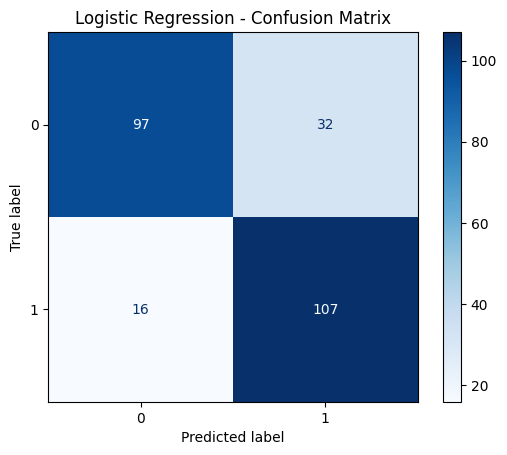

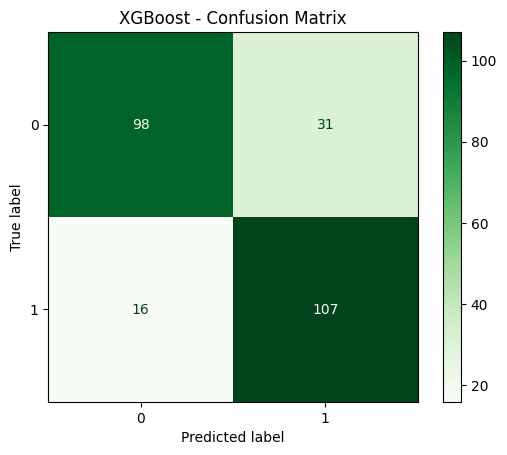

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

# LR Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_preds, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# XGB Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, xgb_preds, cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.show()


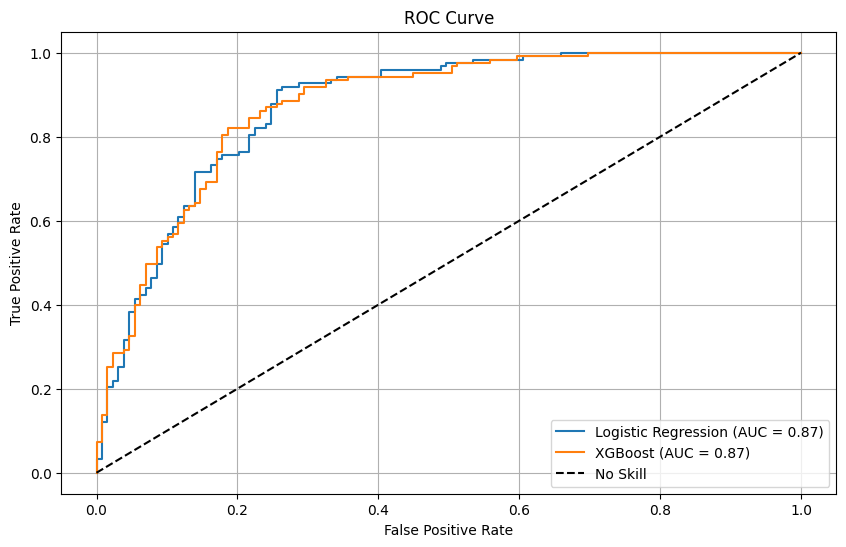

In [14]:
# Calculate ROC
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, lr_probs):.2f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, xgb_probs):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# Grid Search
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_scaled, y_train)

# Best estimator
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Params:", lr_grid.best_params_)

# Evaluate best model
lr_best_preds = best_lr.predict(X_test_scaled)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, lr_best_preds))
print(classification_report(y_test, lr_best_preds))


Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8015873015873016
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       129
           1       0.76      0.86      0.81       123

    accuracy                           0.80       252
   macro avg       0.81      0.80      0.80       252
weighted avg       0.81      0.80      0.80       252



In [17]:
# Define XGBoost hyperparameter grid
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, scoring='accuracy', verbose=1)
xgb_grid.fit(X_train_scaled, y_train)

# Best estimator
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Params:", xgb_grid.best_params_)

# Evaluate best XGB model
xgb_best_preds = best_xgb.predict(X_test_scaled)
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, xgb_best_preds))
print(classification_report(y_test, xgb_best_preds))


Fitting 5 folds for each of 54 candidates, totalling 270 fits


c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarni

Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Tuned XGBoost Accuracy: 0.8055555555555556
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       129
           1       0.74      0.93      0.82       123

    accuracy                           0.81       252
   macro avg       0.83      0.81      0.80       252
weighted avg       0.83      0.81      0.80       252



c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:38:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


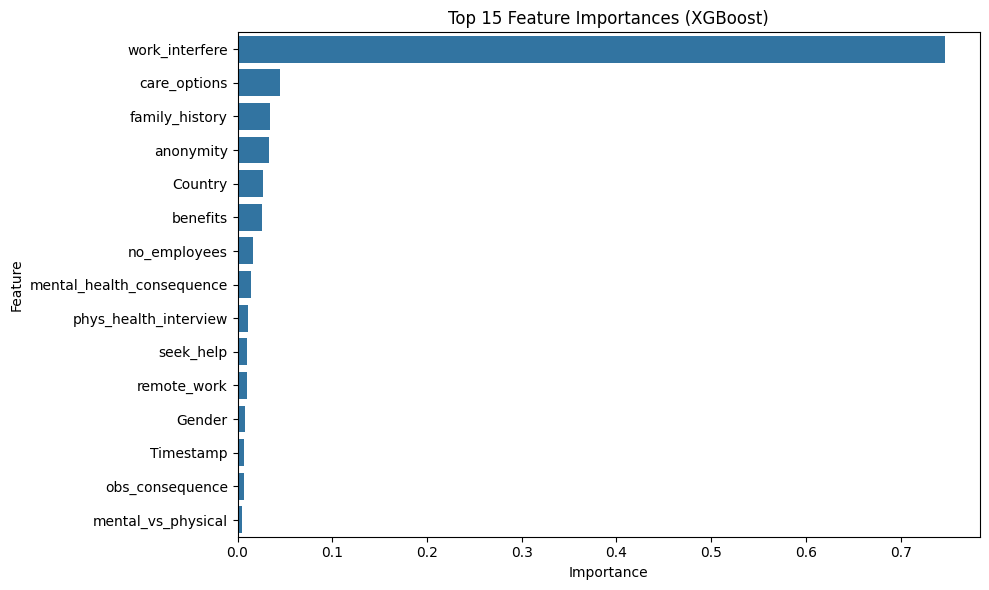

In [18]:
# Plot feature importances from best XGBoost model
importances = best_xgb.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))  # Show top 15 features
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_14844\68327110.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Set2')


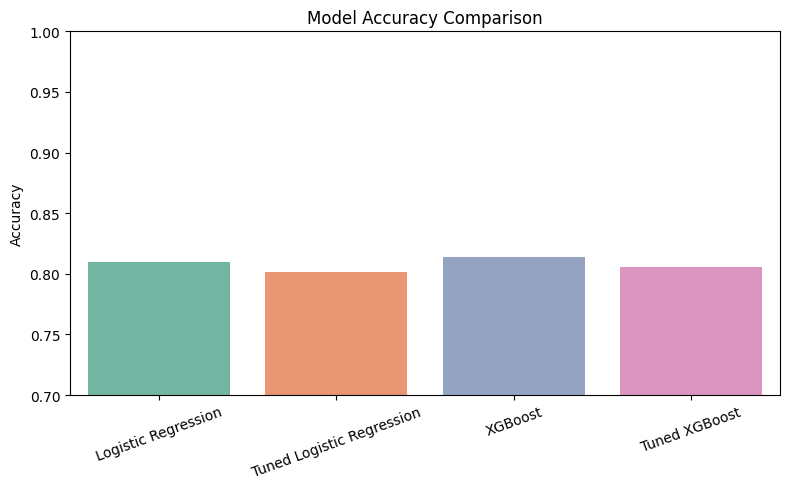

In [19]:
# Prepare results for comparison
model_names = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "XGBoost",
    "Tuned XGBoost"
]

accuracies = [
    accuracy_score(y_test, lr_preds),
    accuracy_score(y_test, lr_best_preds),
    accuracy_score(y_test, xgb_preds),
    accuracy_score(y_test, xgb_best_preds)
]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='Set2')
plt.ylim(0.7, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


## Models Applied

| Model                   | Accuracy | Tuning        |
|------------------------|----------|----------------|
| Logistic Regression    | 0.81     | GridSearchCV  |
| XGBoost Classifier     | 0.813    | GridSearchCV  |

###  Best Performing Model: **Tuned XGBoost**

---

## Evaluation Metrics

- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix
- Classification Report

---

## Feature Importance (from XGBoost)

Top predictors for seeking treatment:
- `family_history`
- `mental_health_interview`
- `leave`
- `anonymity`
- `wellness_program`

---

## Model Comparison Summary

A side-by-side bar chart comparing accuracy of models:
- Logistic Regression
- Tuned Logistic Regression
- XGBoost
- Tuned XGBoost

---

## Future Improvements

- Apply more advanced models (e.g., LightGBM, Ensemble Blending)
- Add time-based patterns or longitudinal analysis
- Create a Streamlit web app for HR tool deployment

---

## Author

Azib Malick  
_Data Scientist & Biomedical Engineer_